In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nbsetup
from models.load import load
from references import milkyway as mref


In [2]:
mm = load('mcmillian2011best_600_100')

Loaded mcmillian2011best_600_100


In [6]:
kpc_to_km = 30856780000000000
G = 6.67430*(10**-11)

def vkms(arr, r):
    return (np.abs(r*arr*G)**0.5)

def plot_velocities(self, dimension='x', xlim=(0,None)):
        
    df = self.dataframe
    sums = self.dataframe_sum
    r = sums['rd']
    veckey = '%s_vec' % dimension
    gx = np.abs(sums[veckey]).to_numpy()
    ax = sums['%s_abs' % dimension].to_numpy()
    ex = ax-gx
    
    trials = {
        #'subtraction': 5*(1-(ex/gx)**0.1),
        'ex/gx': 1*((1+(ex/gx)**0.25)**-1),
        #'ex': 1.3*((1+(ex)**0.5)**-1),
    }
    
    fig, axes = plt.subplots(2, 1, figsize=(20,20))
    
    for component in df['component'].unique():
        vels = vkms(df.query('component=="%s"' % component)[veckey].to_numpy(), r)
        sns.lineplot(x=r, y=vels, ax=axes[0], label=component, linestyle='dotted')
    
    for label, formula in trials.items():
        sns.lineplot(x=r, y=vkms(gx*formula, r), ax=axes[0], label=label)
        sns.lineplot(x=r, y=vkms(formula, r), ax=axes[1], label=label)
    
    #for key, obs in mref.observations.items():
    #    sns.scatterplot(x=obs['radius'], y=np.array(obs['velocity'])*4, ax=axes[0], label=key).set(xlim=xlim)
        


In [7]:
mm.dataframe

,z,y,x,component,z_vec,y_vec,x_vec,z_abs,y_abs,x_abs,zd,rd
0,60,300,300,buldge,-5.102828e-07,2.171808e-08,-1.781724e-07,4.529577e+09,9.648660e+09,9.648660e+09,0,0.0
1,60,300,300,thick,1.249283e-03,2.874149e-09,2.342670e-08,6.182424e+08,9.725397e+08,9.725397e+08,0,0.0
2,60,300,300,thin,9.335849e-08,-1.399174e-07,3.026153e-08,1.894546e+09,5.699458e+09,5.699458e+09,0,0.0
3,60,300,301,buldge,7.705654e-07,-1.004177e-08,3.451433e+10,4.091917e+09,7.831342e+09,3.878743e+10,0,1.0
4,60,300,301,thick,1.248650e-03,1.442268e-08,7.776679e+07,6.069436e+08,9.615095e+08,9.712253e+08,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,60,300,540,thick,2.171341e-05,1.207211e-08,2.296470e+06,2.564701e+04,1.225716e+05,2.296470e+06,0,240.0
77,60,300,540,thin,-5.674031e-12,6.795075e-10,7.467192e+06,2.325636e+04,3.479905e+05,7.467192e+06,0,240.0
78,60,300,570,buldge,-3.730197e-13,2.923957e-13,1.583664e+06,4.358635e+03,9.245070e+03,1.583664e+06,0,270.0
79,60,300,570,thick,1.547803e-05,1.047606e-08,1.811550e+06,1.792258e+04,8.569120e+04,1.811550e+06,0,270.0


In [9]:
mm.radius

100

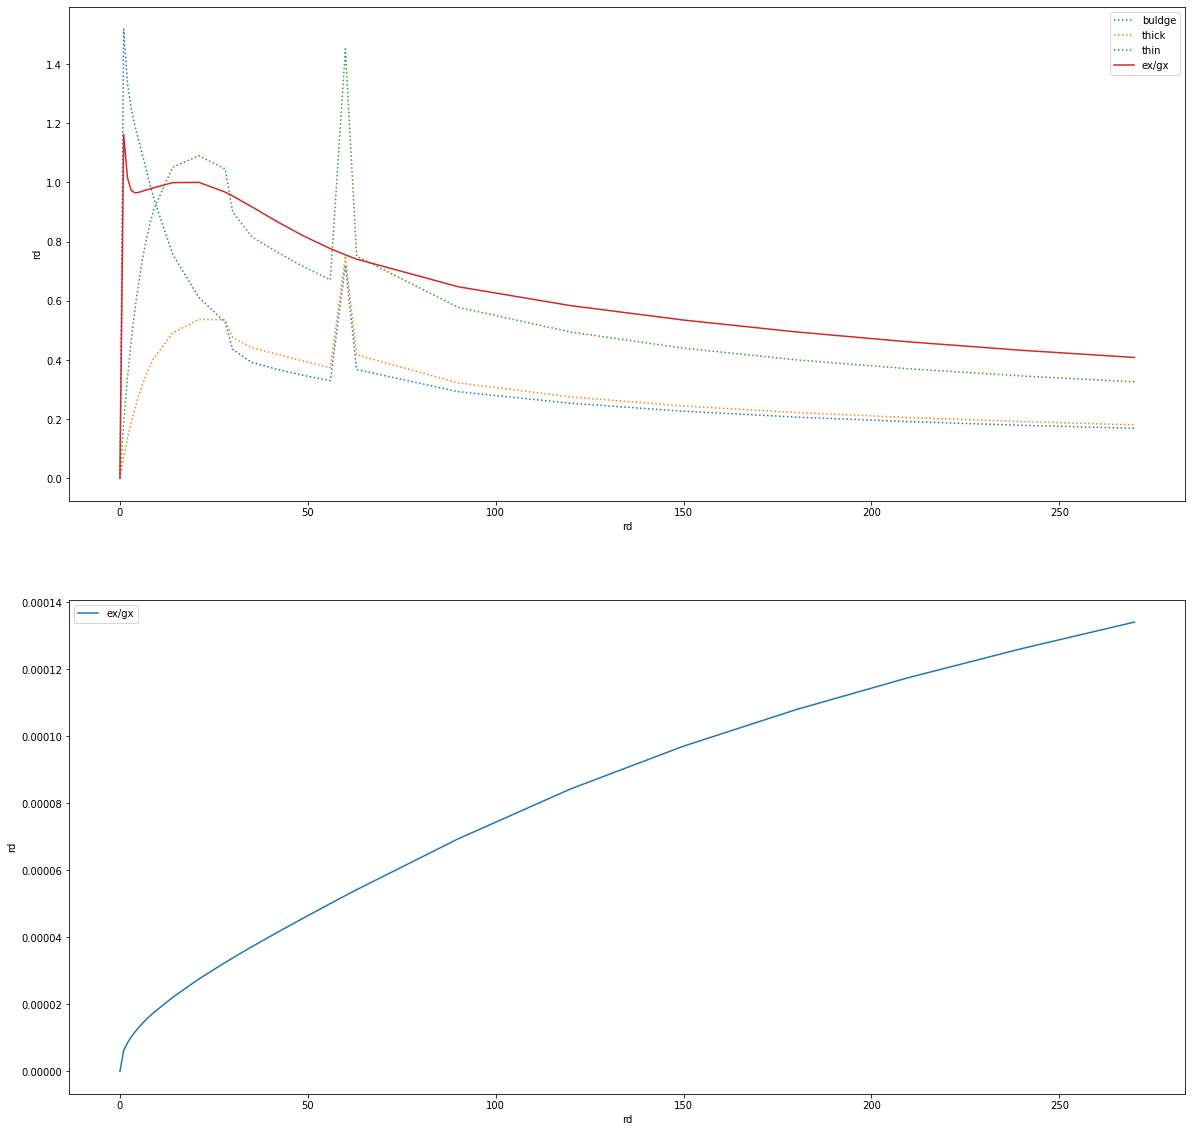

In [8]:
plot_velocities(mm, 'x')

In [ ]:
mm.profiles = mref.profiles['mcmillian2011best']